# ACTIVIDAD 4.2 CDMX

In [2]:
#Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de archivos y revisión de información

In [3]:
data = pd.read_csv('México_filtrado.csv')  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   last_scraped                 26582 non-null  object 
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_location                26582 non-null  object 
 6   host_response_time           26582 non-null  object 
 7   host_response_rate           26582 non-null  object 
 8   host_acceptance_rate         26582 non-null  object 
 9   host_is_superhost            26582 non-null  object 
 10  host_verifications           26582 non-null  object 
 11  host_has_profile_pic         26582 non-null  object 
 12  host_identity_verified       26582 non-null  object 
 13  neighbourhood   

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2668\1236188043.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('México_filtrado.csv')


In [4]:
#Revisamos cuantos valores nulos hay en el dataset
data.isnull().sum().sum()

np.int64(0)

## Procesamiento de outlaiers

In [5]:
#Creamos dos dataframes para poder procesar los outliers numéricos
cuantitativas = data.select_dtypes(include = ['float64', 'int64'])
cualitativas = data.select_dtypes(include = ['object'])

<Figure size 1500x800 with 0 Axes>

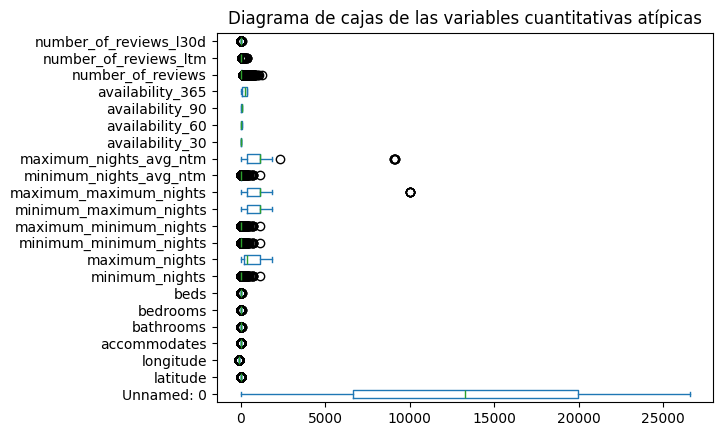

In [6]:
#Graficamos el diagrama de cajas para las variables cuantitativas atípicas
fig = plt.figure(figsize = (15,8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title('Diagrama de cajas de las variables cuantitativas atípicas')
plt.show()

In [7]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              26582 non-null  int64  
 1   latitude                26582 non-null  float64
 2   longitude               26582 non-null  float64
 3   accommodates            26582 non-null  int64  
 4   bathrooms               26582 non-null  float64
 5   bedrooms                26582 non-null  float64
 6   beds                    26582 non-null  float64
 7   minimum_nights          26582 non-null  int64  
 8   maximum_nights          26582 non-null  int64  
 9   minimum_minimum_nights  26582 non-null  int64  
 10  maximum_minimum_nights  26582 non-null  int64  
 11  minimum_maximum_nights  26582 non-null  int64  
 12  maximum_maximum_nights  26582 non-null  int64  
 13  minimum_nights_avg_ntm  26582 non-null  float64
 14  maximum_nights_avg_ntm  26582 non-null

In [8]:
#Valores extremos aplicando los limites superiores e inferiores
y = cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido Unnamed: 0                36311.620292
latitude                     19.532892
longitude                   -99.066742
accommodates                 10.430103
bathrooms                     4.584733
bedrooms                      5.346827
beds                          6.985210
minimum_nights               81.830056
maximum_nights             1793.886762
minimum_minimum_nights       78.220196
maximum_minimum_nights       80.407806
minimum_maximum_nights     2058.532035
maximum_maximum_nights     2133.457176
minimum_nights_avg_ntm       79.496621
maximum_nights_avg_ntm     2102.282688
availability_30              48.523868
availability_60              97.331591
availability_90             149.606839
availability_365            602.609273
number_of_reviews           271.153557
number_of_reviews_ltm        75.059793
number_of_reviews_l30d        6.823979
dtype: float64
Limite inferior permitido Unnamed: 0               -9730.620292
latitude                    19.276851

In [9]:
#Obtenemos datos y los outliers se converten en nulos en el dataset
data2 = cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
data2

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,0,19.383820,NaN,2.0,1.0,1.0,1.0,1.0,7.0,1.0,...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,1,19.411620,-99.177940,NaN,1.0,5.0,2.0,1.0,365.0,1.0,...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,2,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30.0,2.0,...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,3,19.356140,-99.163080,2.0,1.0,1.0,1.0,5.0,180.0,3.0,...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,4,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365.0,1.0,...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,19.387329,-99.246731,4.0,1.0,2.0,2.0,1.0,45.0,2.0,...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,26578,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,26579,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,26580,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [10]:
#Revisamos cuantos valores nulos hay en el dataset por columnas
data2.isnull().sum()

Unnamed: 0                  0
latitude                  357
longitude                 712
accommodates              526
bathrooms                 309
bedrooms                  286
beds                      466
minimum_nights            190
maximum_nights              1
minimum_minimum_nights    174
maximum_minimum_nights    192
minimum_maximum_nights      0
maximum_maximum_nights      7
minimum_nights_avg_ntm    184
maximum_nights_avg_ntm      7
availability_30             0
availability_60             0
availability_90             0
availability_365            0
number_of_reviews         608
number_of_reviews_ltm     432
number_of_reviews_l30d    511
dtype: int64

In [11]:
#Reemplazamos los valores nulos por la media de la columna
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(),1))
data_clean

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,0,19.383820,-99.200000,2.0,1.0,1.0,1.0,1.0,7.0,1.0,...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,1,19.411620,-99.177940,3.1,1.0,5.0,2.0,1.0,365.0,1.0,...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,2,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30.0,2.0,...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,3,19.356140,-99.163080,2.0,1.0,1.0,1.0,5.0,180.0,3.0,...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,4,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365.0,1.0,...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,19.387329,-99.246731,4.0,1.0,2.0,2.0,1.0,45.0,2.0,...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,26578,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,26579,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,26580,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365.0,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [12]:
#Revisamos cuantos valores nulos hay en el dataset por columnas
valores_nulos = data_clean.isnull().sum()
valores_nulos

Unnamed: 0                0
latitude                  0
longitude                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
minimum_nights            0
maximum_nights            0
minimum_minimum_nights    0
maximum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
maximum_nights_avg_ntm    0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
number_of_reviews_l30d    0
dtype: int64

## Procedimiento "CUANTILES" para sustituir outlaiers en el DataFrame

In [13]:
#Aplicamos cuartiles 0.25 y 0.75 para identificar los outliers
y = cuantitativas
percentil25 = y.quantile(0.25) #Q1
percentil75 = y.quantile(0.75) #Q3
iqr = percentil75 - percentil25

Limite_superior_iqr = percentil75 + 1.5*iqr
Limite_inferior_iqr = percentil25 - 1.5*iqr
print("Limite superior permitido", Limite_superior_iqr)
print("Limite inferior permitido", Limite_inferior_iqr)

Limite superior permitido Unnamed: 0                39871.500000
latitude                     19.494089
longitude                   -99.117734
accommodates                  7.000000
bathrooms                     3.500000
bedrooms                      3.500000
beds                          3.500000
minimum_nights                3.500000
maximum_nights             2542.500000
minimum_minimum_nights        3.500000
maximum_minimum_nights        6.000000
minimum_maximum_nights     2265.000000
maximum_maximum_nights     2265.000000
minimum_nights_avg_ntm        5.250000
maximum_nights_avg_ntm     2265.000000
availability_30              63.500000
availability_60             113.000000
availability_90             162.500000
availability_365            710.500000
number_of_reviews           135.500000
number_of_reviews_ltm        52.500000
number_of_reviews_l30d        5.000000
dtype: float64
Limite inferior permitido Unnamed: 0               -13290.500000
latitude                     19.3279

In [14]:
#Obtenemos datos y los outliers se converten en nulos en el dataset
data3_iqr = cuantitativas[(y <= Limite_superior_iqr) & (y >= Limite_inferior_iqr)]
data3_iqr

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,0,19.383820,NaN,2.0,1.0,1.0,1.0,1.0,7,1.0,...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,1,19.411620,-99.177940,NaN,1.0,NaN,2.0,1.0,365,1.0,...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,2,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,2.0,...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,3,19.356140,-99.163080,2.0,1.0,1.0,1.0,NaN,180,3.0,...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,4,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365,1.0,...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,19.387329,NaN,4.0,1.0,2.0,2.0,1.0,45,2.0,...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,26578,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,26579,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,26580,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [15]:
#Corroboramos cuantos valores nulos hay en el dataset
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                   0
latitude                  1779
longitude                 2845
accommodates              1352
bathrooms                  644
bedrooms                   858
beds                      2447
minimum_nights            3584
maximum_nights               0
minimum_minimum_nights    3124
maximum_minimum_nights    2040
minimum_maximum_nights       0
maximum_maximum_nights       7
minimum_nights_avg_ntm    2023
maximum_nights_avg_ntm       7
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews         2328
number_of_reviews_ltm     1318
number_of_reviews_l30d     813
dtype: int64

In [16]:
#Reemplazamos los valores nulos por la media de la columna
data_clean_iqr = data3_iqr.copy()
data_clean_iqr = data_clean_iqr.fillna(round(data3_iqr.mean(),1))
data_clean_iqr

,Unnamed: 0,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,0,19.383820,-99.200000,2.0,1.0,1.0,1.0,1.0,7,1.0,...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,1,19.411620,-99.177940,2.9,1.0,1.4,2.0,1.0,365,1.0,...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,2,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,2.0,...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,3,19.356140,-99.163080,2.0,1.0,1.0,1.0,1.6,180,3.0,...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,4,19.432110,-99.193270,2.0,1.5,1.0,1.0,1.0,365,1.0,...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,19.387329,-99.200000,4.0,1.0,2.0,2.0,1.0,45,2.0,...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,26578,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,26579,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,26580,19.432687,-99.197736,2.0,1.0,1.0,1.0,1.0,365,1.0,...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [17]:
#Revisamos cuantos valores nulos hay en el dataset por columnas
valores_nulos = data_clean_iqr.isnull().sum()
valores_nulos

Unnamed: 0                0
latitude                  0
longitude                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
minimum_nights            0
maximum_nights            0
minimum_minimum_nights    0
maximum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
maximum_nights_avg_ntm    0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
number_of_reviews_l30d    0
dtype: int64

In [18]:
#Unimos los dataframes cualitativos y cuantitativos
data_clean_iqr = pd.concat([cualitativas, data_clean_iqr], axis = 1)
data_clean_iqr

,last_scraped,name,description,neighborhood_overview,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,...,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,2024-09-25,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...","Mexico City, Mexico",a few days or more,0%,Without information,f,"['email', 'phone', 'work_email']",...,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0
1,2024-09-26,Condesa Haus,A new concept of hosting in mexico through a b...,Nothing to say,"Mexico City, Mexico",within an hour,100%,93%,t,"['email', 'phone', 'work_email']",...,365.0,1.0,365.0,1,24,54,325,64.0,0.0,0.0
2,2024-09-26,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nothing to say,"Mexico City, Mexico",within an hour,71%,57%,t,"['email', 'phone']",...,30.0,2.0,30.0,3,20,50,325,49.0,4.0,0.0
3,2024-09-25,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,"Mexico City, Mexico",within a few hours,100%,100%,t,"['email', 'phone', 'work_email']",...,180.0,3.7,180.0,7,27,57,257,127.0,7.0,2.0
4,2024-09-25,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...","Mexico City, Mexico",within an hour,100%,100%,t,"['email', 'phone']",...,1125.0,1.0,1125.0,9,9,20,275,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,2024-09-25,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,"Welcome to Lomas de Bezares, a neighborhood kn...","Mexico City, Mexico",within an hour,100%,100%,t,"['email', 'phone']",...,45.0,2.9,45.0,30,60,90,365,0.0,0.0,0.0
26578,2024-09-25,Suite King | District Polanco,This spacious room features a plush king-size ...,Nothing to say,"Mexico City, Mexico",within an hour,100%,100%,f,"['email', 'phone']",...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26579,2024-09-25,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Nothing to say,"Mexico City, Mexico",within an hour,100%,100%,f,"['email', 'phone']",...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0
26580,2024-09-25,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Nothing to say,"Mexico City, Mexico",within an hour,100%,100%,f,"['email', 'phone']",...,365.0,1.0,365.0,0,0,0,177,0.0,0.0,0.0


In [19]:
#Revisamos cuantos valores nulos hay en el dataset
valores_nulos = data_clean_iqr.isnull().sum().sum()
valores_nulos

np.int64(0)

## Creación del archivo CSV

In [20]:
data_clean_iqr.to_csv("CDMX_sin_outliers.csv")